<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
    <h1>Evaluating the Efficiency of Fuzzy Logic in Washing Machine Control Systems</h1>
    <p>In this scenario, the goal is to control the room temperature by adjusting the air flow mixing. The system has two inputs: hot air flow and cold air flow, and one output: the voltage to the pump, which controls the mixing of hot and cold air flows.</p>
    <h2>System Operation</h2>
    <ol>
        <li><strong>Fuzzy Logic Control:</strong> Fuzzy logic can be used to control the voltage output based on the inputs of hot and cold air flows. Here's how it can be done:
            <ul>
                <li><strong>Fuzzification:</strong> The inputs (hot and cold air flows) are fuzzified into linguistic variables with membership functions representing their degrees of membership in different categories (e.g., low, medium, high).</li>
                <li><strong>Rule Base:</strong> Fuzzy rules are formulated to determine the relationship between the inputs and the output (voltage). These rules capture the expert knowledge or experience about how to adjust the voltage based on the inputs to achieve the desired room temperature.</li>
                <li><strong>Inference Engine:</strong> The fuzzy inference engine applies the fuzzy rules to the fuzzified inputs to determine the output (voltage). This involves computing the degree of activation of each rule and aggregating the results to obtain a fuzzy output.</li>
                <li><strong>Defuzzification:</strong> The fuzzy output is then defuzzified to obtain a crisp value for the voltage output. This can be done using methods like centroid defuzzification, which calculates the center of mass of the output membership functions.</li>
            </ul>
        </li>
    </ol>
    <p>By using fuzzy logic control, the system can adjust the voltage to the pump in real-time based on the inputs of hot and cold air flows, allowing for a flexible and adaptive control strategy that can respond to changes in room temperature conditions effectively.</p>
</body>
</html>


## Installing scikit-fuzzy Library

This command will download and install the scikit-fuzzy package from the Python Package Index (PyPI). Once installed, you can import and use scikit-fuzzy in your Python scripts for fuzzy logic applications.

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.0 MB/s eta 0:00:00


## Importing Libraries

<!DOCTYPE html>
<html lang="en">
<body>
    <p><strong></strong> The code imports necessary libraries including NumPy, scikit-fuzzy, and Matplotlib. Here's how each library helps us:</p>
    <ul>
        <li><strong>NumPy:</strong> NumPy is used for numerical operations and array manipulations. It provides efficient tools for handling arrays and mathematical functions, which are essential for data manipulation in fuzzy logic control.</li>
        <li><strong>scikit-fuzzy:</strong> scikit-fuzzy is a Python library for fuzzy logic operations. It provides tools for fuzzy set theory, fuzzy inference systems, and fuzzy control, making it suitable for implementing fuzzy logic control systems.</li>
        <li><strong>Matplotlib:</strong> Matplotlib is a plotting library that allows us to visualize data and results. In the context of fuzzy logic control, Matplotlib can be used to create plots and graphs to analyze system behavior and performance.</li>
    </ul>
</body>
</html>

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt

<!DOCTYPE html>
<html lang="en">
<body>
  <ul>
        <li><strong>scikit-fuzzy control submodule:</strong> This submodule provides functionality for creating and simulating fuzzy control systems. It includes tools for defining fuzzy variables, membership functions, rules, and control system simulations. By importing this submodule as ctrl, we can access its functionalities using a convenient shorthand notation.</li>
    </ul>
</body>
</html>


# Define fuzzy variables

In [ ]:
load = ctrl.Antecedent(np.arange(0, 101, 1), 'load')  # percentage
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')  # Celsius
fabric = ctrl.Antecedent(np.arange(0, 11, 1), 'fabric')  # 0 = delicate, 10 = heavy
dirtiness = ctrl.Antecedent(np.arange(0, 11, 1), 'dirtiness')  # 0 = clean, 10 = dirty

# Define fuzzy output variables

In [ ]:
spin_speed = ctrl.Consequent(np.arange(400, 1201, 1), 'spin_speed')  # RPM
wash_duration = ctrl.Consequent(np.arange(20, 91, 1), 'wash_duration')  # Minutes
intensity = ctrl.Consequent(np.arange(0, 101, 1), 'intensity')  # %

# Membership functions

In [ ]:
# Load size
load['small'] = fuzz.trimf(load.universe, [0, 0, 5])
load['medium'] = fuzz.trimf(load.universe, [2, 5, 8])
load['large'] = fuzz.trimf(load.universe, [5, 10, 10])

# Water temperature (°C)
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 40])
temperature['warm'] = fuzz.trimf(temperature.universe, [30, 50, 70])
temperature['hot'] = fuzz.trimf(temperature.universe, [60, 100, 100])

# Fabric type (softness/sensitivity scale: 0 = delicate, 10 = tough)
fabric['delicate'] = fuzz.trimf(fabric.universe, [0, 0, 5])
fabric['normal'] = fuzz.trimf(fabric.universe, [2, 5, 8])
fabric['tough'] = fuzz.trimf(fabric.universe, [5, 10, 10])

# Dirtiness level
dirtiness['light'] = fuzz.trimf(dirtiness.universe, [0, 0, 5])
dirtiness['medium'] = fuzz.trimf(dirtiness.universe, [2, 5, 8])
dirtiness['heavy'] = fuzz.trimf(dirtiness.universe, [5, 10, 10])

In [ ]:
spin_speed['low'] = fuzz.trimf(spin_speed.universe, [400, 500, 700])
spin_speed['medium'] = fuzz.trimf(spin_speed.universe, [600, 800, 1000])
spin_speed['high'] = fuzz.trimf(spin_speed.universe, [900, 1100, 1200])

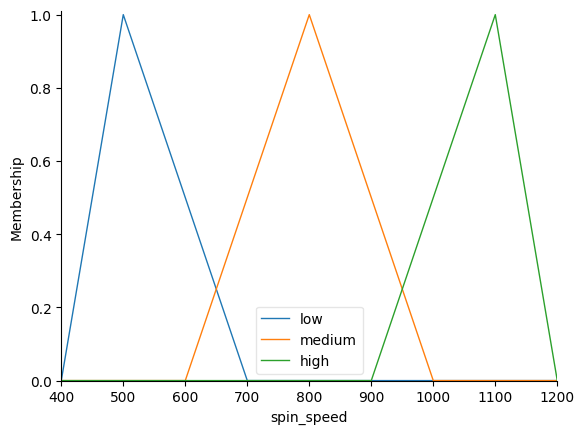

In [ ]:
# Plot membership functions for visualization
spin_speed.view()
plt.show()

In [ ]:
wash_duration['short'] = fuzz.trimf(wash_duration.universe, [20, 30, 45])
wash_duration['medium'] = fuzz.trimf(wash_duration.universe, [35, 50, 65])
wash_duration['long'] = fuzz.trimf(wash_duration.universe, [60, 75, 90])

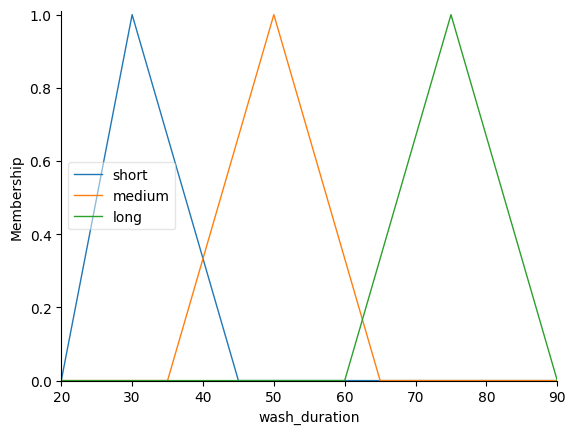

In [ ]:
# Plot membership functions for visualization
wash_duration.view()
plt.show()

In [ ]:
intensity['low'] = fuzz.trimf(intensity.universe, [0, 25, 50])
intensity['medium'] = fuzz.trimf(intensity.universe, [40, 60, 80])
intensity['high'] = fuzz.trimf(intensity.universe, [70, 85, 100])

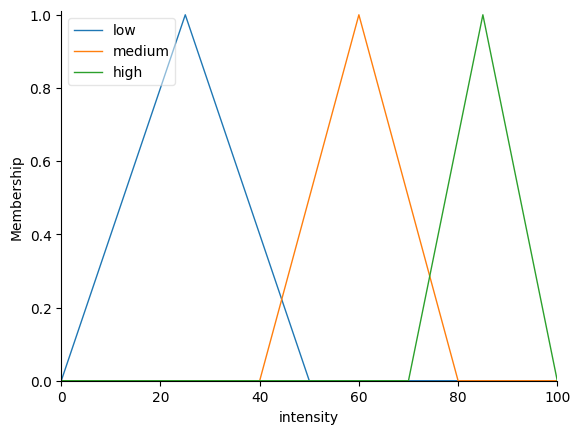

In [ ]:
# Plot membership functions for visualization
intensity.view()
plt.show()

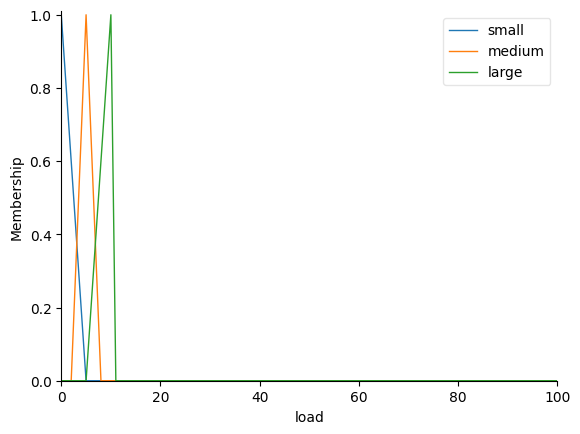

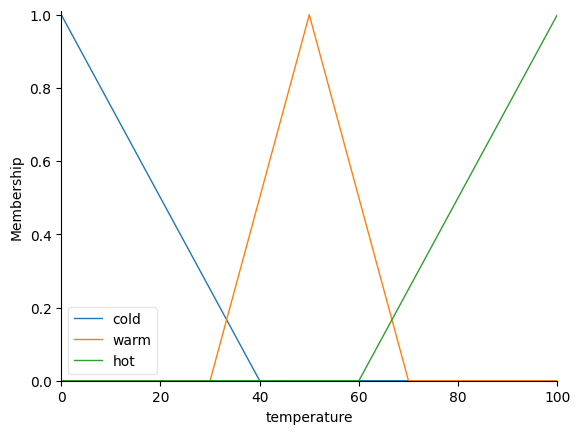

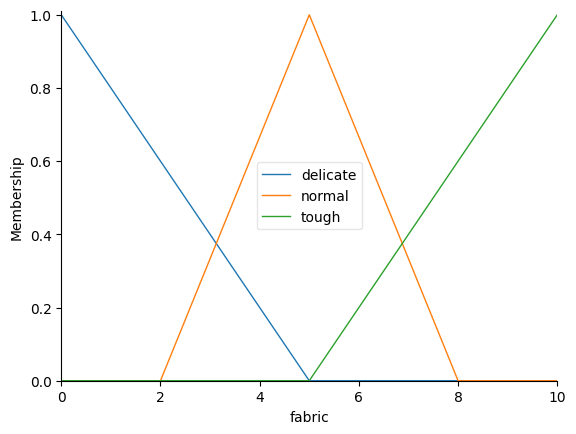

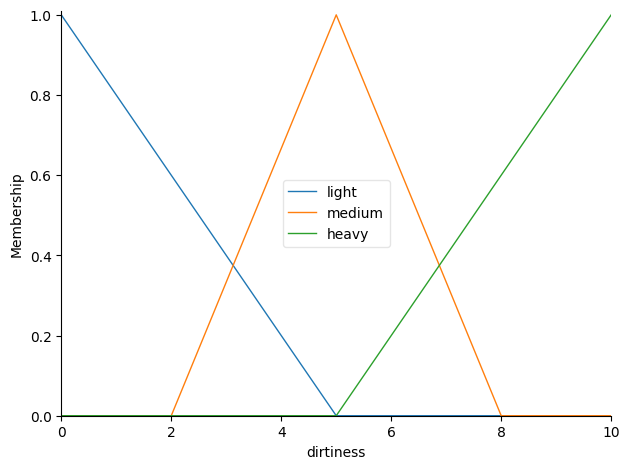

In [ ]:
# Plot membership functions
load.view()
temperature.view()
fabric.view()
dirtiness.view()

plt.tight_layout()
plt.show()

# Define the rules

In [ ]:
from skfuzzy.control import Rule

In [ ]:
rules = [
    # Rule 0
    Rule(antecedent=(load['small'] & dirtiness['light']),
         consequent=[spin_speed['low'], wash_duration['short']],
         label='Rule 0'),

    # Rule 1
    Rule(antecedent=(load['medium'] & fabric['normal']),
         consequent=[spin_speed['medium'], wash_duration['medium']],
         label='Rule 1'),

    # Rule 2
    Rule(antecedent=(load['large'] & fabric['tough']),
         consequent=[spin_speed['high'], wash_duration['long']],
         label='Rule 2'),

    # Rule 3
    Rule(antecedent=(fabric['delicate'] & temperature['cold']),
         consequent=spin_speed['low'],
         label='Rule 3'),

    # Rule 4
    Rule(antecedent=(fabric['tough'] & temperature['hot']),
         consequent=spin_speed['high'],
         label='Rule 4'),

    # Rule 5
    Rule(antecedent=(dirtiness['heavy'] & temperature['warm']),
         consequent=wash_duration['long'],
         label='Rule 5'),

    # Rule 6
    Rule(antecedent=(dirtiness['medium'] & load['medium']),
         consequent=wash_duration['medium'],
         label='Rule 6'),

    # Rule 7
    Rule(antecedent=(dirtiness['light'] & fabric['normal']),
         consequent=wash_duration['short'],
         label='Rule 7'),

    # Rule 8
    Rule(antecedent=(load['large'] & temperature['cold']),
         consequent=wash_duration['long'],
         label='Rule 8'),

    # Rule 9
    Rule(antecedent=(load['small'] & fabric['delicate']),
         consequent=spin_speed['low'],
         label='Rule 9'),
]

# Create the control system


In [ ]:
system = ctrl.ControlSystem(rules)
fuzzy_sim = ctrl.ControlSystemSimulation(system)

In [ ]:
print(fuzzy_sim.output)

OrderedDict()


# Define test scenarios

In [ ]:
np.random.seed(0)
test_data = pd.DataFrame({
    'load': np.random.randint(20, 100, 10),
    'temperature': np.random.randint(20, 70, 10),
    'fabric': np.random.randint(1, 10, 10),
    'dirtiness': np.random.randint(1, 10, 10)
})

# Evaluate fuzzy and regular results

In [ ]:
results = []

for i, row in test_data.iterrows():
    fuzzy_sim.input['load'] = row['load']
    fuzzy_sim.input['temperature'] = row['temperature']
    fuzzy_sim.input['fabric'] = row['fabric']
    fuzzy_sim.input['dirtiness'] = row['dirtiness']
    fuzzy_sim.compute()

    fuzzy_time = fuzzy_sim.output.get('wash_duration', 0)
    fuzzy_speed = fuzzy_sim.output.get('spin_speed', 0)
    fuzzy_intensity = fuzzy_sim.output.get('intensity', 0)

    fuzzy_energy = 0.2 * fuzzy_time + 0.005 * fuzzy_speed * (fuzzy_intensity / 100)

    # ماشین معمولی: فرض کن همیشه مقادیر ثابت استفاده می‌کنه
    reg_time = 60
    reg_speed = 800
    reg_intensity = 70
    reg_energy = 0.2 * reg_time + 0.005 * reg_speed * (reg_intensity / 100)

    results.append({
        **row,
        'fuzzy_time': fuzzy_time,
        'reg_time': reg_time,
        'fuzzy_speed': fuzzy_speed,
        'reg_speed': reg_speed,
        'fuzzy_intensity': fuzzy_intensity,
        'reg_intensity': reg_intensity,
        'fuzzy_energy': fuzzy_energy,
        'reg_energy': reg_energy
    })


In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
results_df

,load,temperature,fabric,dirtiness,fuzzy_time,reg_time,fuzzy_speed,reg_speed,fuzzy_intensity,reg_intensity,fuzzy_energy,reg_energy
0,64,21,9,2,0.000000,60,0.000000,800,0,70,0.000000,14.8
1,67,58,5,4,32.259259,60,0.000000,800,0,70,6.451852,14.8
2,84,59,4,4,32.259259,60,0.000000,800,0,70,6.451852,14.8
3,87,43,1,4,0.000000,60,0.000000,800,0,70,0.000000,14.8
4,87,66,4,8,75.000000,60,0.000000,800,0,70,15.000000,14.8
5,29,44,6,1,31.805556,60,0.000000,800,0,70,6.361111,14.8
6,41,37,1,2,0.000000,60,548.149351,800,0,70,0.000000,14.8
7,56,57,3,1,32.111111,60,0.000000,800,0,70,6.422222,14.8
8,90,45,4,5,0.000000,60,0.000000,800,0,70,0.000000,14.8
9,32,33,9,8,75.000000,60,0.000000,800,0,70,15.000000,14.8


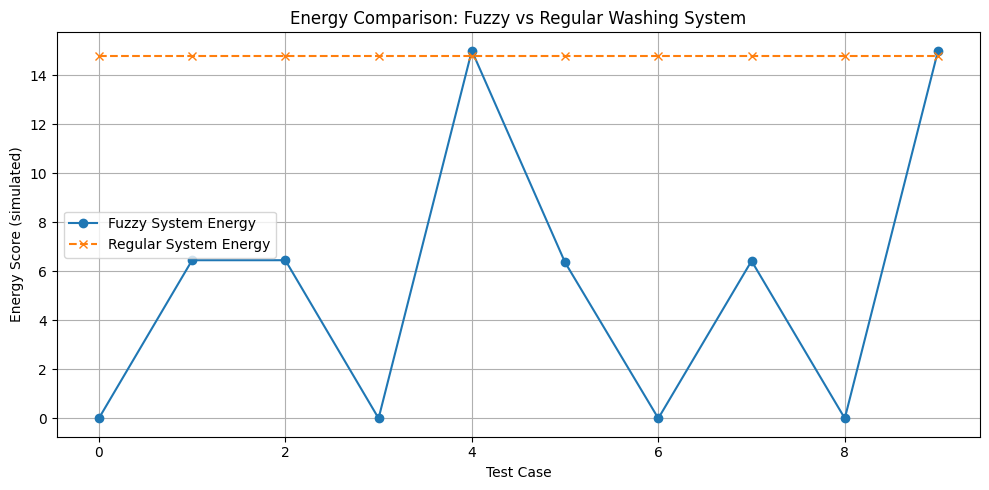

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(results_df['fuzzy_energy'], label='Fuzzy System Energy', marker='o')
plt.plot(results_df['reg_energy'], label='Regular System Energy', linestyle='--', marker='x')
plt.xlabel('Test Case')
plt.ylabel('Energy Score (simulated)')
plt.title('Energy Comparison: Fuzzy vs Regular Washing System')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Print average energy
print("Average Energy Consumption:")
print(results_df[['fuzzy_energy', 'reg_energy']].mean())

Average Energy Consumption:
fuzzy_energy     5.568704
reg_energy      14.800000
dtype: float64


In [ ]:
scenario_data = pd.DataFrame([
    {'load': 2, 'temperature': 30, 'fabric': 2, 'dirtiness': 2},
    {'load': 6, 'temperature': 40, 'fabric': 6, 'dirtiness': 7},
    {'load': 8, 'temperature': 60, 'fabric': 9, 'dirtiness': 9},
])

In [ ]:
results2 = []

for i, row in scenario_data.iterrows():
    fuzzy_sim.input['load'] = row['load']
    fuzzy_sim.input['temperature'] = row['temperature']
    fuzzy_sim.input['fabric'] = row['fabric']
    fuzzy_sim.input['dirtiness'] = row['dirtiness']
    fuzzy_sim.compute()

    fuzzy_time = fuzzy_sim.output.get('wash_duration', 0)
    fuzzy_speed = fuzzy_sim.output.get('spin_speed', 0)
    fuzzy_intensity = fuzzy_sim.output.get('intensity', 0)

    fuzzy_energy = 0.2 * fuzzy_time + 0.005 * fuzzy_speed * (fuzzy_intensity / 100)

    # ماشین معمولی: فرض کن همیشه مقادیر ثابت استفاده می‌کنه
    reg_time = 60
    reg_speed = 800
    reg_intensity = 70
    reg_energy = 0.2 * reg_time + 0.005 * reg_speed * (reg_intensity / 100)

    results2.append({
        **row,
        'fuzzy_time': fuzzy_time,
        'reg_time': reg_time,
        'fuzzy_speed': fuzzy_speed,
        'reg_speed': reg_speed,
        'fuzzy_intensity': fuzzy_intensity,
        'reg_intensity': reg_intensity,
        'fuzzy_energy': fuzzy_energy,
        'reg_energy': reg_energy
    })


In [ ]:
results2_df = pd.DataFrame(results)

In [ ]:
results2_df

,load,temperature,fabric,dirtiness,fuzzy_time,reg_time,fuzzy_speed,reg_speed,fuzzy_intensity,reg_intensity,fuzzy_energy,reg_energy
0,64,21,9,2,0.000000,60,0.000000,800,0,70,0.000000,14.8
1,67,58,5,4,32.259259,60,0.000000,800,0,70,6.451852,14.8
2,84,59,4,4,32.259259,60,0.000000,800,0,70,6.451852,14.8
3,87,43,1,4,0.000000,60,0.000000,800,0,70,0.000000,14.8
4,87,66,4,8,75.000000,60,0.000000,800,0,70,15.000000,14.8
5,29,44,6,1,31.805556,60,0.000000,800,0,70,6.361111,14.8
6,41,37,1,2,0.000000,60,548.149351,800,0,70,0.000000,14.8
7,56,57,3,1,32.111111,60,0.000000,800,0,70,6.422222,14.8
8,90,45,4,5,0.000000,60,0.000000,800,0,70,0.000000,14.8
9,32,33,9,8,75.000000,60,0.000000,800,0,70,15.000000,14.8


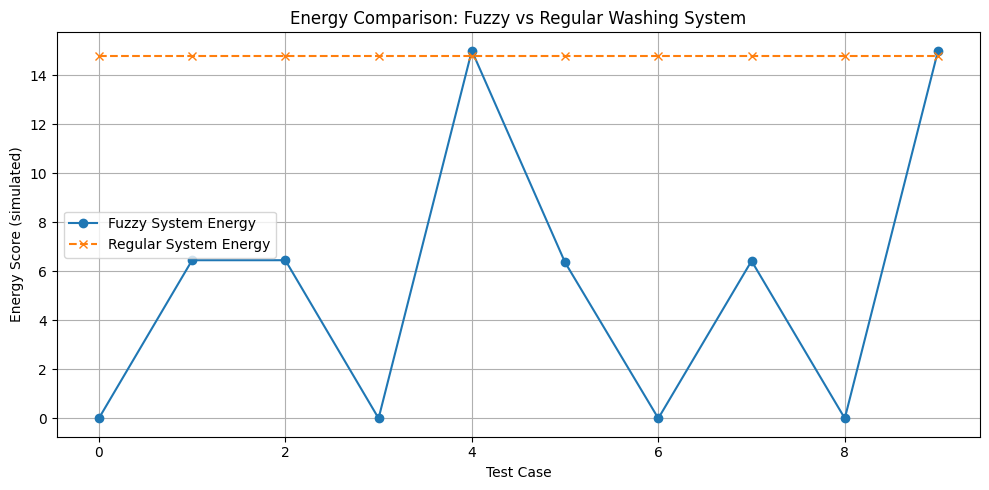

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(results2_df['fuzzy_energy'], label='Fuzzy System Energy', marker='o')
plt.plot(results2_df['reg_energy'], label='Regular System Energy', linestyle='--', marker='x')
plt.xlabel('Test Case')
plt.ylabel('Energy Score (simulated)')
plt.title('Energy Comparison: Fuzzy vs Regular Washing System')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
 # Print average energy
print("Average Energy Consumption:")
print(results2_df[['fuzzy_energy', 'reg_energy']].mean())

Average Energy Consumption:
fuzzy_energy     5.568704
reg_energy      14.800000
dtype: float64
